## EDA for King County Housing

### The client is Larry Sanders.

- Waterfront
- Limited budget
- Nice & Isolated 
- But central neighborhood 
- Without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

## Questions

1. Are there Waterfront Properties that fit a limited budget?
    - Does a limited budget exclude outliers and whiskers?
2. What influences the price most? View or Waterfront?
    - If the waterfront house is closer to the city center, is the price higher?
3. Are there isolated properties in central neighborhoods?
    - Is a smaller waterfront house with big lot size cheaper than a big waterfront house with smaller lot?
4. If your neighbours had big properties would you consider the area closer to the city and not so isolated?
5. What are the best areas to buy in the city with the biggest lot sizes?

### Some Information

Your client wants to get a good understanding of the general housing condition in Seattle and surroundings and furthermore to have some recommendations tailored to their needs.


In [448]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [449]:
df = pd.read_csv('./data/eda.csv')

#converting to proper datetime format
df.date = pd.to_datetime(df.date)
df = df.rename({'id.1': 'sale_id'}, axis=1)
df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'sale_id'],
      dtype='object')

In [450]:
df.shape

(21597, 23)

In [451]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


<Axes: >

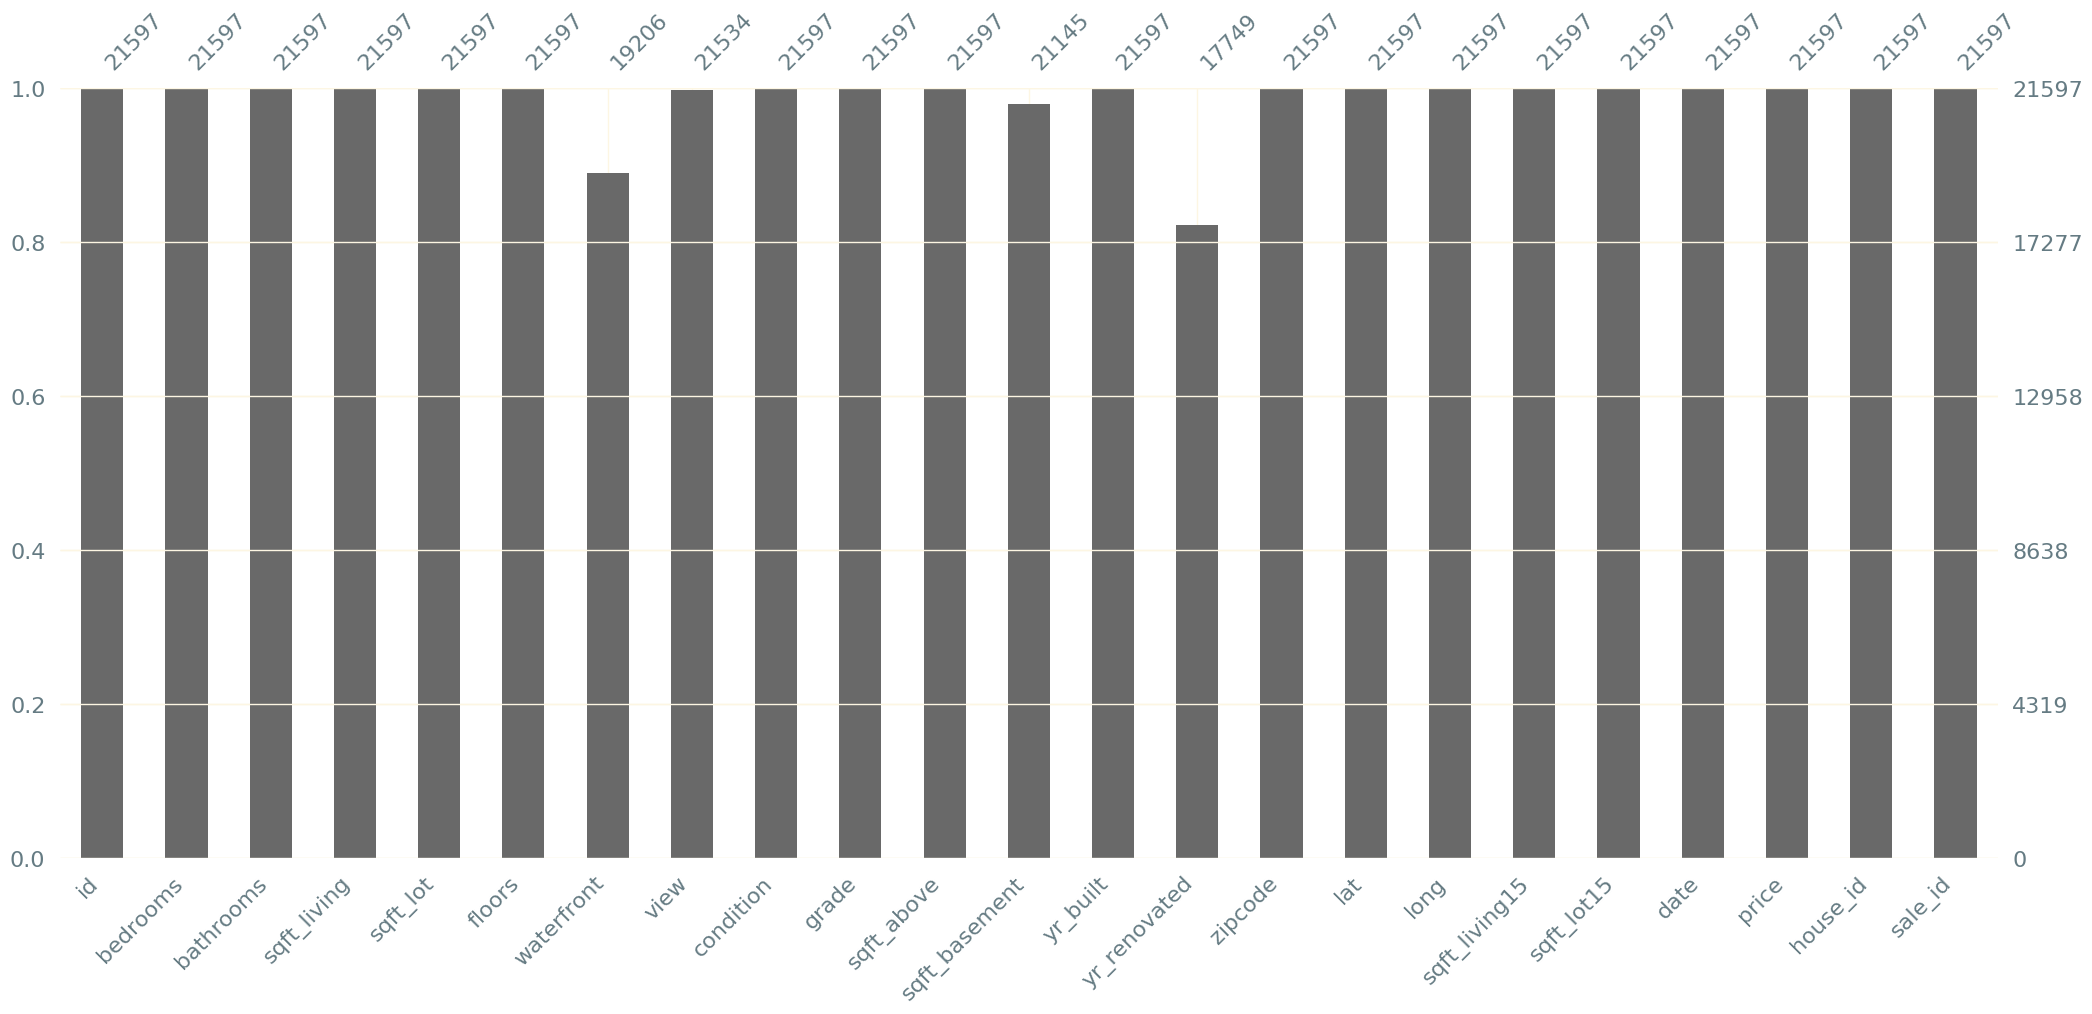

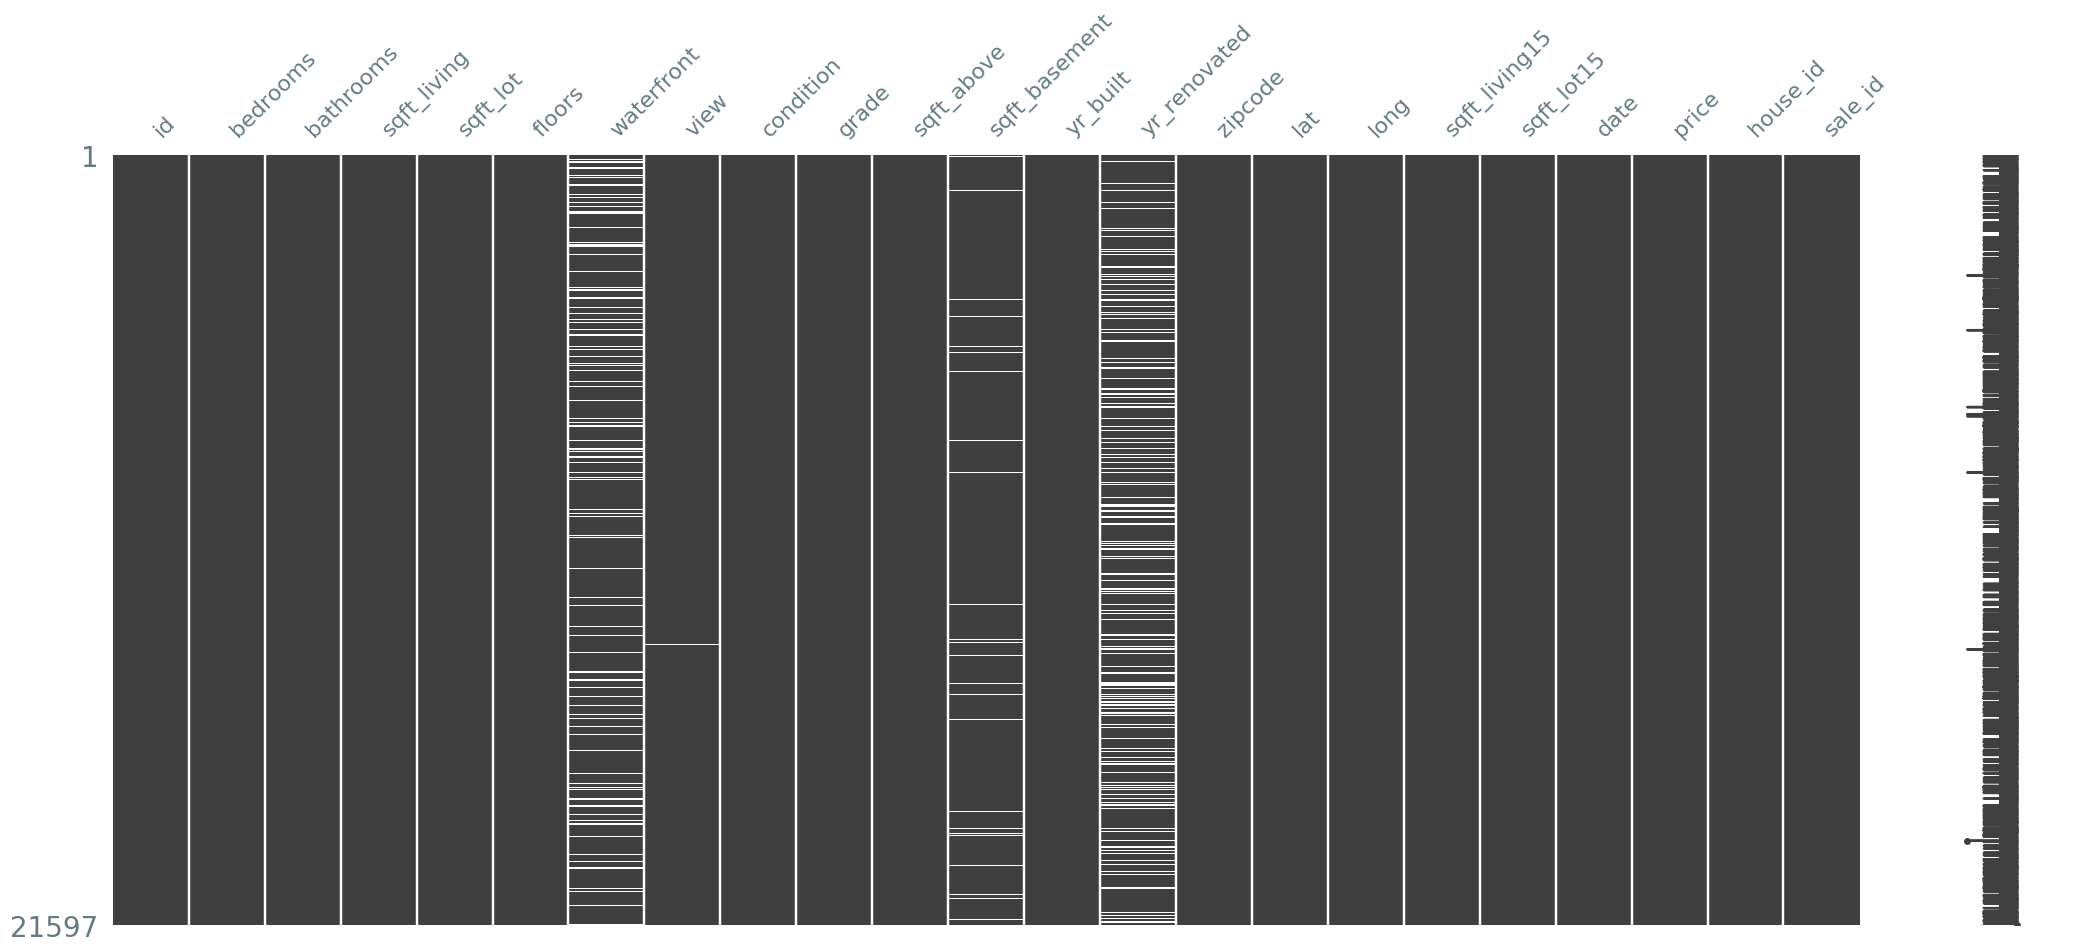

In [452]:
msno.bar(df)
msno.matrix(df)

In [453]:
# examining whether there are random values
df.waterfront.unique()

array([nan,  0.,  1.])

In [454]:
df.duplicated().value_counts()
# we don't have any duplicates

False    21597
Name: count, dtype: int64

In [455]:
# save these real estate properties for later
df_waterfront_unknown= df[df['waterfront'].isna() == True]
df_on_waterfront = df[df['waterfront'] == 1]

df_on_waterfront

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id
49,822039084,3.000,2.500,2753.000,65005.000,1.000,1.000,2.000,5,9,...,0.000,98070,47.404,-122.451,2680.000,72513.000,2015-03-11,1350000.000,822039084,50
230,8096000060,2.000,1.750,1450.000,15798.000,2.000,1.000,4.000,3,7,...,19780.000,98166,47.450,-122.375,2030.000,13193.000,2015-04-13,655000.000,8096000060,231
246,2025069065,4.000,2.500,3650.000,8354.000,1.000,1.000,4.000,3,9,...,0.000,98074,47.634,-122.072,3120.000,18841.000,2014-09-29,2400000.000,2025069065,247
264,2123039032,1.000,0.750,760.000,10079.000,1.000,1.000,4.000,5,5,...,0.000,98070,47.468,-122.438,1230.000,14267.000,2014-10-27,369900.000,2123039032,265
300,3225069065,4.000,5.000,4550.000,18641.000,1.000,1.000,4.000,3,10,...,0.000,98074,47.605,-122.077,4550.000,19508.000,2014-06-24,3080000.000,3225069065,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3.000,2.500,2830.000,4334.000,3.000,1.000,4.000,3,10,...,0.000,98074,47.632,-122.071,2830.000,38211.000,2015-03-17,1900000.000,2025069140,19969
20309,518500480,3.000,3.500,4410.000,10756.000,2.000,1.000,4.000,3,11,...,0.000,98056,47.528,-122.205,3550.000,5634.000,2014-08-11,3000000.000,518500480,20310
20751,8043700105,4.000,4.000,4360.000,8175.000,2.500,1.000,4.000,3,10,...,0.000,98008,47.572,-122.104,2670.000,8525.000,2015-04-17,2300000.000,8043700105,20752
21185,518500460,3.000,3.500,3760.000,5634.000,2.000,1.000,4.000,3,11,...,0.000,98056,47.529,-122.205,3560.000,5762.000,2014-10-08,2230000.000,518500460,21186


In [456]:

title = "Waterfront Properties in King County Close to City Centers"

lats = df_on_waterfront.lat
lons = df_on_waterfront.long

fig = px.scatter_mapbox(df_on_waterfront, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color='price',
                        color_continuous_scale=px.colors.carto.Sunsetdark,
                        zoom=9.5
                        )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})

fig.show()

### Calculate the distance from City Centers of Seattle and Bellevue

In [457]:


CONST_SEATTLE_CENTER = 47.608013, -122.335167
CONST_BELLEVUE_CENTER = 47.610378, -122.200676

# ((haversine(CONST_SEATTLE_CENTER, CONST_BELLEVUE_CENTER, Unit.MILES)))
# distance_seattle = [(row.lat, row.long) for _, row in df_on_waterfront[['lat', 'long']].iterrows()]

df_on_waterfront['distance_seattle_center'] = [haversine((row.lat, row.long), CONST_SEATTLE_CENTER, Unit.MILES) for _, row in df_on_waterfront[['lat', 'long']].iterrows()]
df_on_waterfront['distance_bellevue_center'] = [haversine((row.lat, row.long), CONST_BELLEVUE_CENTER, Unit.MILES) for _, row in df_on_waterfront[['lat', 'long']].iterrows()]

# data is clean
# df_on_waterfront['waterfront'].describe()


In [458]:
df_city_distance_20 = df_on_waterfront[(df_on_waterfront['distance_seattle_center'] < 20) | (df_on_waterfront['distance_bellevue_center'] < 20)]

title = "Properties in Seattle"

lats = df_city_distance_20.lat
lons = df_city_distance_20.long

fig = px.scatter_mapbox(df_city_distance_20, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color='price',
                        color_continuous_scale=px.colors.carto.Agsunset_r, 
                        zoom=9.5,
                        title=title
                        )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=700, width=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})

fig.show()

In [459]:
df_on_waterfront.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id,distance_seattle_center,distance_bellevue_center
count,146.000,146.000,146.000,146.000,146.000,146.000,146.000,145.000,146.000,146.000,...,146.000,146.000,146.000,146.000,146,146.000,146.000,146.000,146.000,146.000
mean,4454968693.048,3.349,2.709,3244.753,25870.884,1.630,1.000,3.786,3.541,8.836,...,47.540,-122.278,2682.829,22893.699,2014-10-29 16:16:26.301369856,1717214.726,4454968693.048,10216.966,10.396,9.992
min,121029034.000,1.000,0.750,440.000,1989.000,1.000,1.000,1.000,1.000,5.000,...,47.328,-122.514,750.000,3230.000,2014-05-08 00:00:00,285000.000,121029034.000,50.000,2.487,2.015
25%,2016368797.000,3.000,1.812,2082.500,11692.250,1.000,1.000,4.000,3.000,8.000,...,47.453,-122.376,2075.000,11991.500,2014-07-23 06:00:00,827500.000,2016368797.000,4235.750,7.690,5.567
50%,3692779634.000,3.000,2.500,2900.000,17730.500,2.000,1.000,4.000,3.000,9.000,...,47.548,-122.273,2695.000,16260.500,2014-10-25 00:00:00,1510000.000,3692779634.000,10642.000,10.444,7.599
75%,7390450150.000,4.000,3.250,4117.500,26692.500,2.000,1.000,4.000,4.000,10.000,...,47.608,-122.210,3140.000,24537.500,2015-01-27 18:00:00,2282500.000,7390450150.000,15778.750,12.239,13.777
max,9808700762.000,6.000,6.750,10040.000,505166.000,3.000,1.000,4.000,5.000,12.000,...,47.773,-122.059,4913.000,192268.000,2015-05-11 00:00:00,7060000.000,9808700762.000,21561.000,20.670,23.984
std,2858044756.510,1.099,1.122,1652.135,44629.076,0.548,0.000,0.555,0.744,1.781,...,0.114,0.124,808.410,23264.086,NaN,1145384.857,2858044756.510,6427.840,3.971,5.634


## Getting all properties that are 30 miles or less from Seattle OR Bellevue

### Thesis - Proximity to City Center influences Price?

Question: If the waterfront house is closer to the city center, is the price higher?

Findings: 

1. Only slightly - Prices are distributed quite evenly
2. Prices are Influences by distance in Bellevue
3. Prices don't vary much when farther from Seattly city center

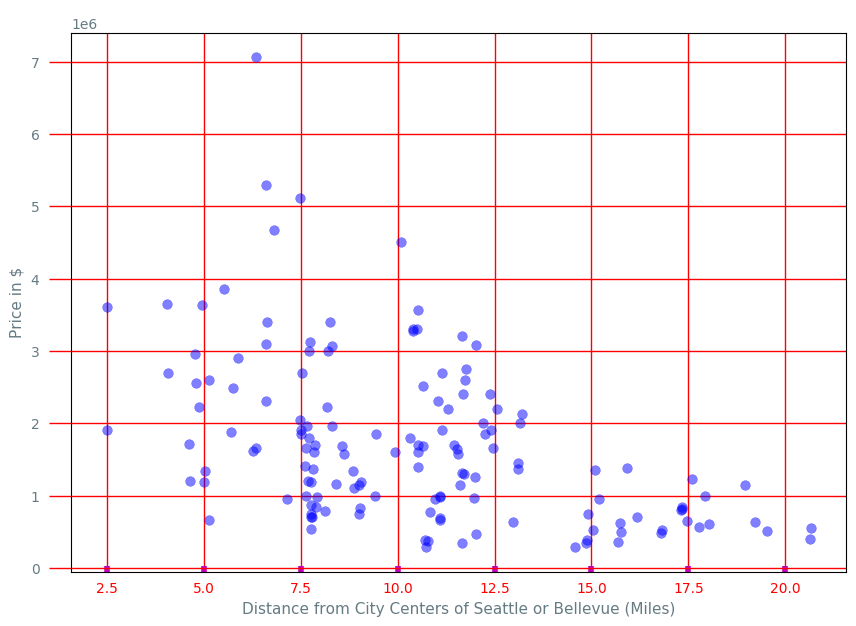

In [ ]:
distance = 25
df_city_distance = df_on_waterfront[(df_on_waterfront['distance_seattle_center'] < distance) | (df_on_waterfront['distance_bellevue_center'] < distance)]
distance_seattle = df_city_distance['distance_seattle_center']
distance_bellevue = df_city_distance['distance_bellevue_center']
price = df_city_distance['price']

plt.style.use( 'seaborn-v0_8-pastel')

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(distance_seattle, price, alpha=.5, color="blue")
ax.set_title('Prices vs Distance from City Center', fontsize=14)
ax.set_ylabel('Price in $')
ax.set_xlabel('Distance from City Centers of Seattle or Bellevue (Miles)')

ax.tick_params(right=False, left=True, axis='y', color='r', length=16,
                grid_color='r')
ax.tick_params(axis='x', color='m', length=4, direction='in', width=4,
                labelcolor='r', grid_color='r')
ax.ticklabel_format(style="plain", axis="y")  

plt.show()

In [305]:
df_on_waterfront['price'].describe()


count       115.000
mean    1733351.304
std     1182632.603
min      285000.000
25%      795000.000
50%     1570000.000
75%     2350000.000
max     7060000.000
Name: price, dtype: float64

In [255]:
median_rounded = round(df_on_waterfront['price'].median())
df_waterfront_selection = df_on_waterfront
df_on_waterfront

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id,distance_seattle_center,distance_bellevue_center
246,2025069065,4.000,2.500,3650.000,8354.000,1.000,1.000,4.000,3,9,...,47.634,-122.072,3120.000,18841.000,2014-09-29,2400000.000,2025069065,247,12.385,6.207
300,3225069065,4.000,5.000,4550.000,18641.000,1.000,1.000,4.000,3,10,...,47.605,-122.077,4550.000,19508.000,2014-06-24,3080000.000,3225069065,301,12.028,5.772
656,3760500116,3.000,2.500,3930.000,55867.000,1.000,1.000,4.000,4,8,...,47.702,-122.224,2730.000,26324.000,2014-11-20,3070000.000,3760500116,657,8.314,6.436
1080,7567600045,2.000,1.000,1150.000,12775.000,1.000,1.000,4.000,4,6,...,47.502,-122.222,2440.000,11852.000,2014-08-27,825000.000,7567600045,1081,9.028,7.554
1155,8069000075,4.000,1.750,2460.000,10061.000,1.000,1.000,4.000,3,7,...,47.511,-122.238,2300.000,10061.000,2014-12-29,790000.000,8069000075,1156,8.119,7.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3.000,2.500,2830.000,4334.000,3.000,1.000,4.000,3,10,...,47.632,-122.071,2830.000,38211.000,2015-03-17,1900000.000,2025069140,19969,12.412,6.218
20309,518500480,3.000,3.500,4410.000,10756.000,2.000,1.000,4.000,3,11,...,47.528,-122.205,3550.000,5634.000,2014-08-11,3000000.000,518500480,20310,8.195,5.675
20751,8043700105,4.000,4.000,4360.000,8175.000,2.500,1.000,4.000,3,10,...,47.572,-122.104,2670.000,8525.000,2015-04-17,2300000.000,8043700105,20752,11.050,5.213
21185,518500460,3.000,3.500,3760.000,5634.000,2.000,1.000,4.000,3,11,...,47.529,-122.205,3560.000,5762.000,2014-10-08,2230000.000,518500460,21186,8.186,5.661
